In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#let's read the data
df=pd.read_csv('train.csv')
#let's read the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#let's get some info about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#lets see the shape of the data
df.shape

(1460, 81)

In [4]:
#lets know some statistical information about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
#lets describe the object columns 
df.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [29]:
#remove the duplicate rows in the data
#df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [30]:

#ohh we donot have any duplicates rows

## Handling missing values 

In [5]:
# missing values in all columns
mising_values=df.isnull().sum().sort_values(ascending=False)
#percentage of null values in all columns 
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#select only  the columns with the missing values 
mising_values[mising_values> 0 ]
#display and convert them to dataframe 
data_miss=pd.concat([mising_values,percent],axis=1,keys=['total missing values','percent of null'])
#let's see who have the most missing data
data_miss.head(20)


,total missing values,percent of null
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [6]:
#Explore the dtypes of columns that have missing values 
df.loc[:, mising_values.index].dtypes

PoolQC         object
MiscFeature    object
Alley          object
Fence          object
MasVnrType     object
                ...  
ExterQual      object
Exterior2nd    object
Exterior1st    object
RoofMatl       object
SalePrice       int64
Length: 81, dtype: object

## Let's remove and select some features

In [7]:
df=df.drop(columns='Id')
# here we will remove the columns that have missing values >=81(12 columns )
df=df.drop((data_miss[data_miss['total missing values']>=81]).index ,axis=1)
# remove one row that contain NaN in the column electrical
df=df.drop(df.loc[df['Electrical'].isnull()].index)



In [8]:
print('the shape of the data after deleting features that have missing values >= 81',df.shape)

the shape of the data after deleting features that have missing values >= 81 (1459, 68)


In [9]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
#select the numerical columns
print(df.select_dtypes(include=['number']).columns)
#if we want to count the numeric columns 
df.select_dtypes(include='number').columns.shape[0]


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


35

In [11]:
numeric_columns=df.select_dtypes(include='number')
numeric_columns


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


#  detecting ouliers by ploting box plot

this plot show the outoutliers in each column


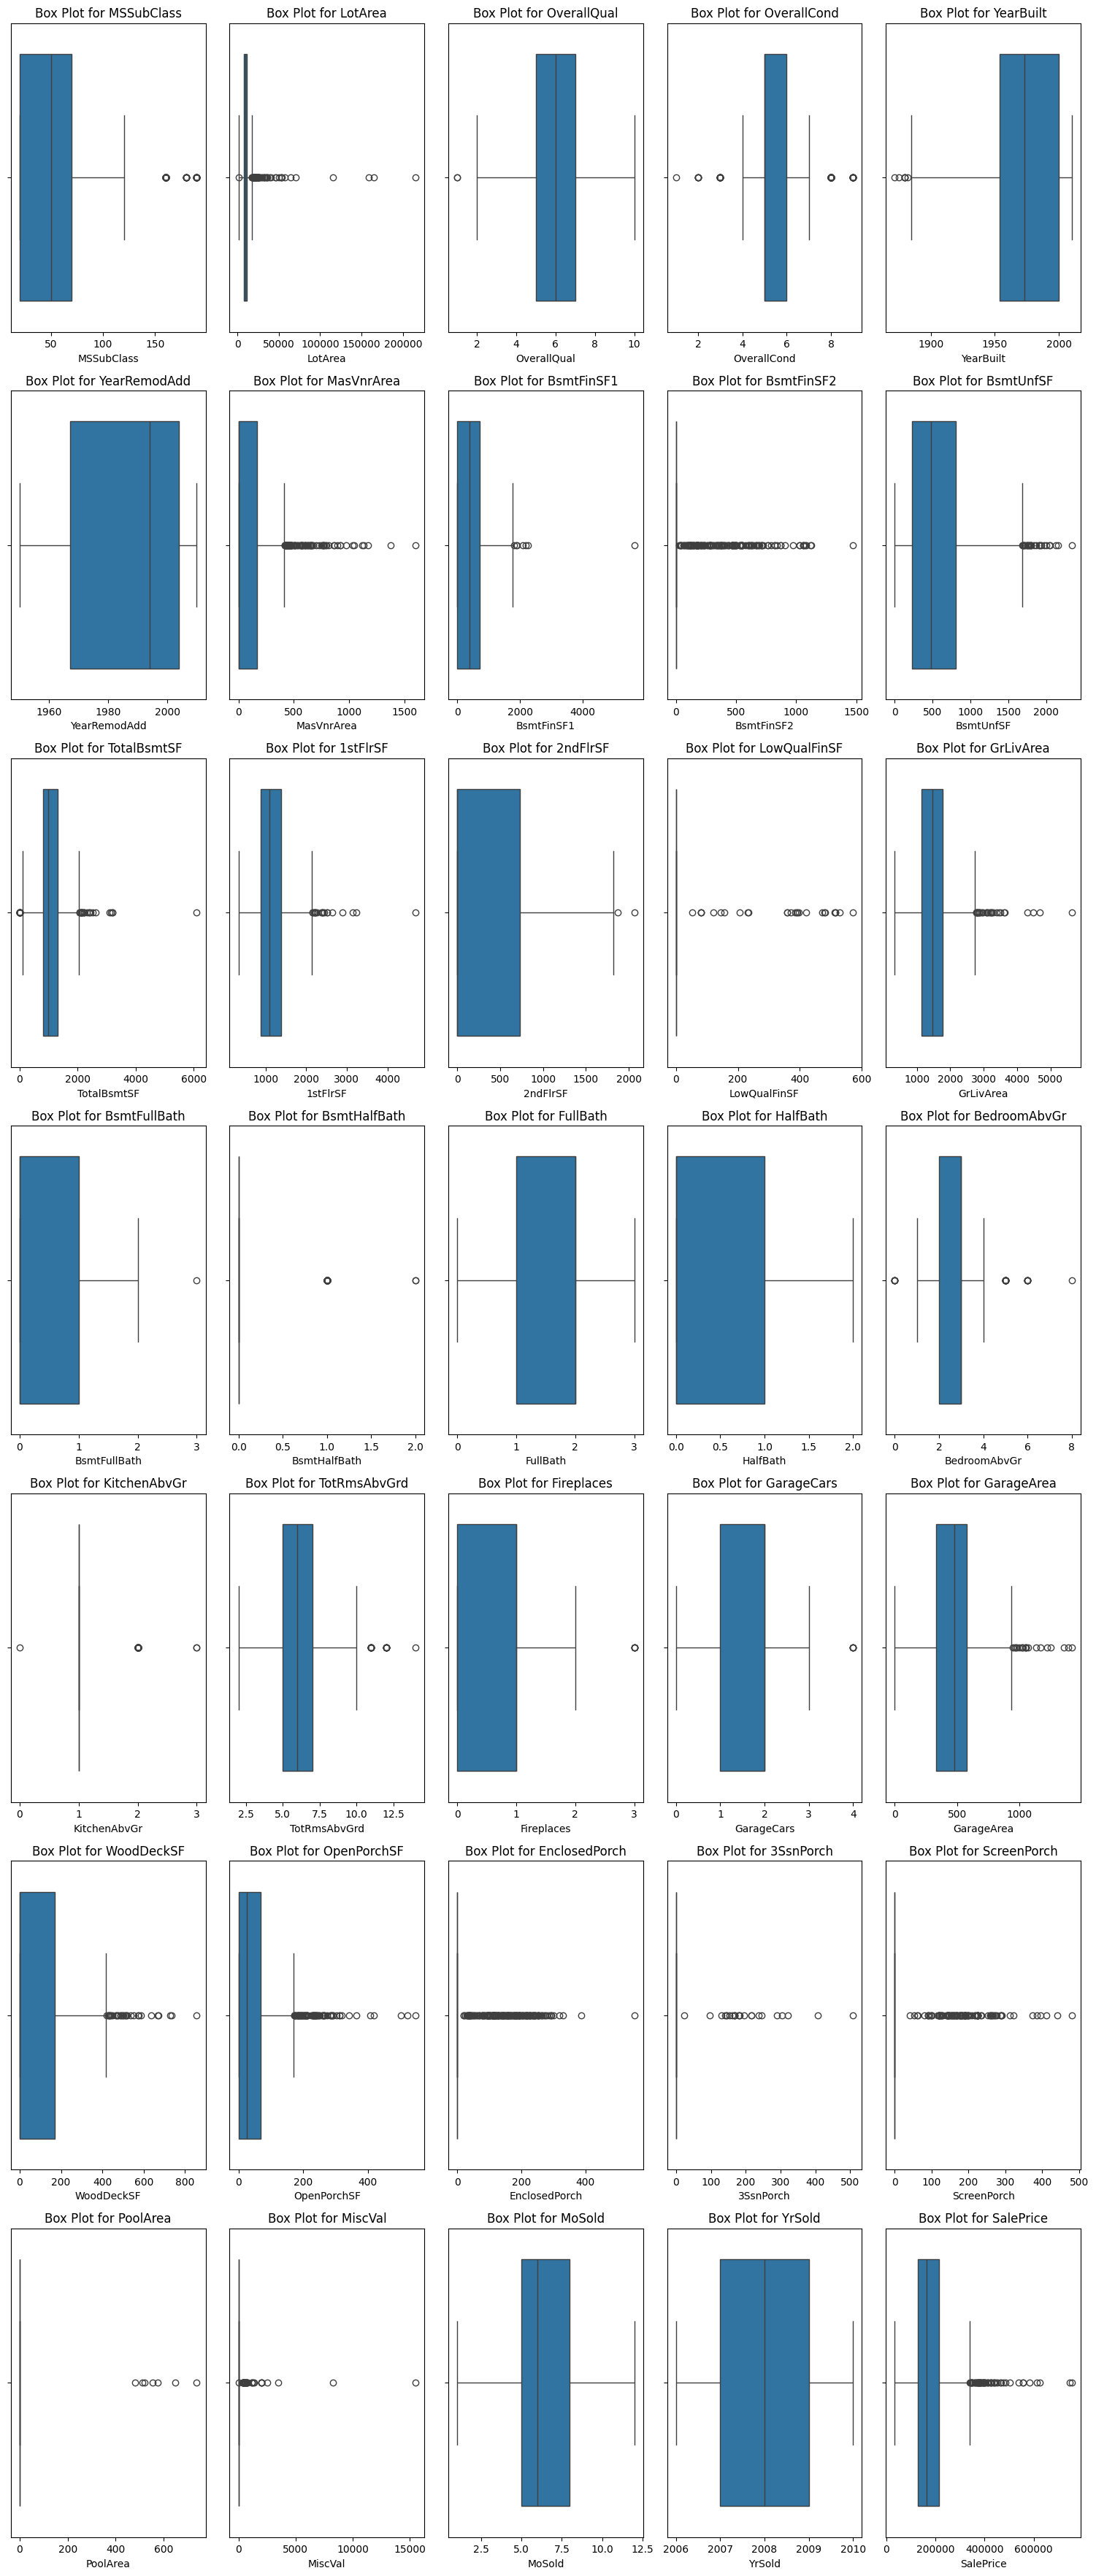

In [12]:
print("this plot show the outoutliers in each column")

# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 5  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it into 1D array it's easier to access  
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

# correlation analythsis 

<Axes: >

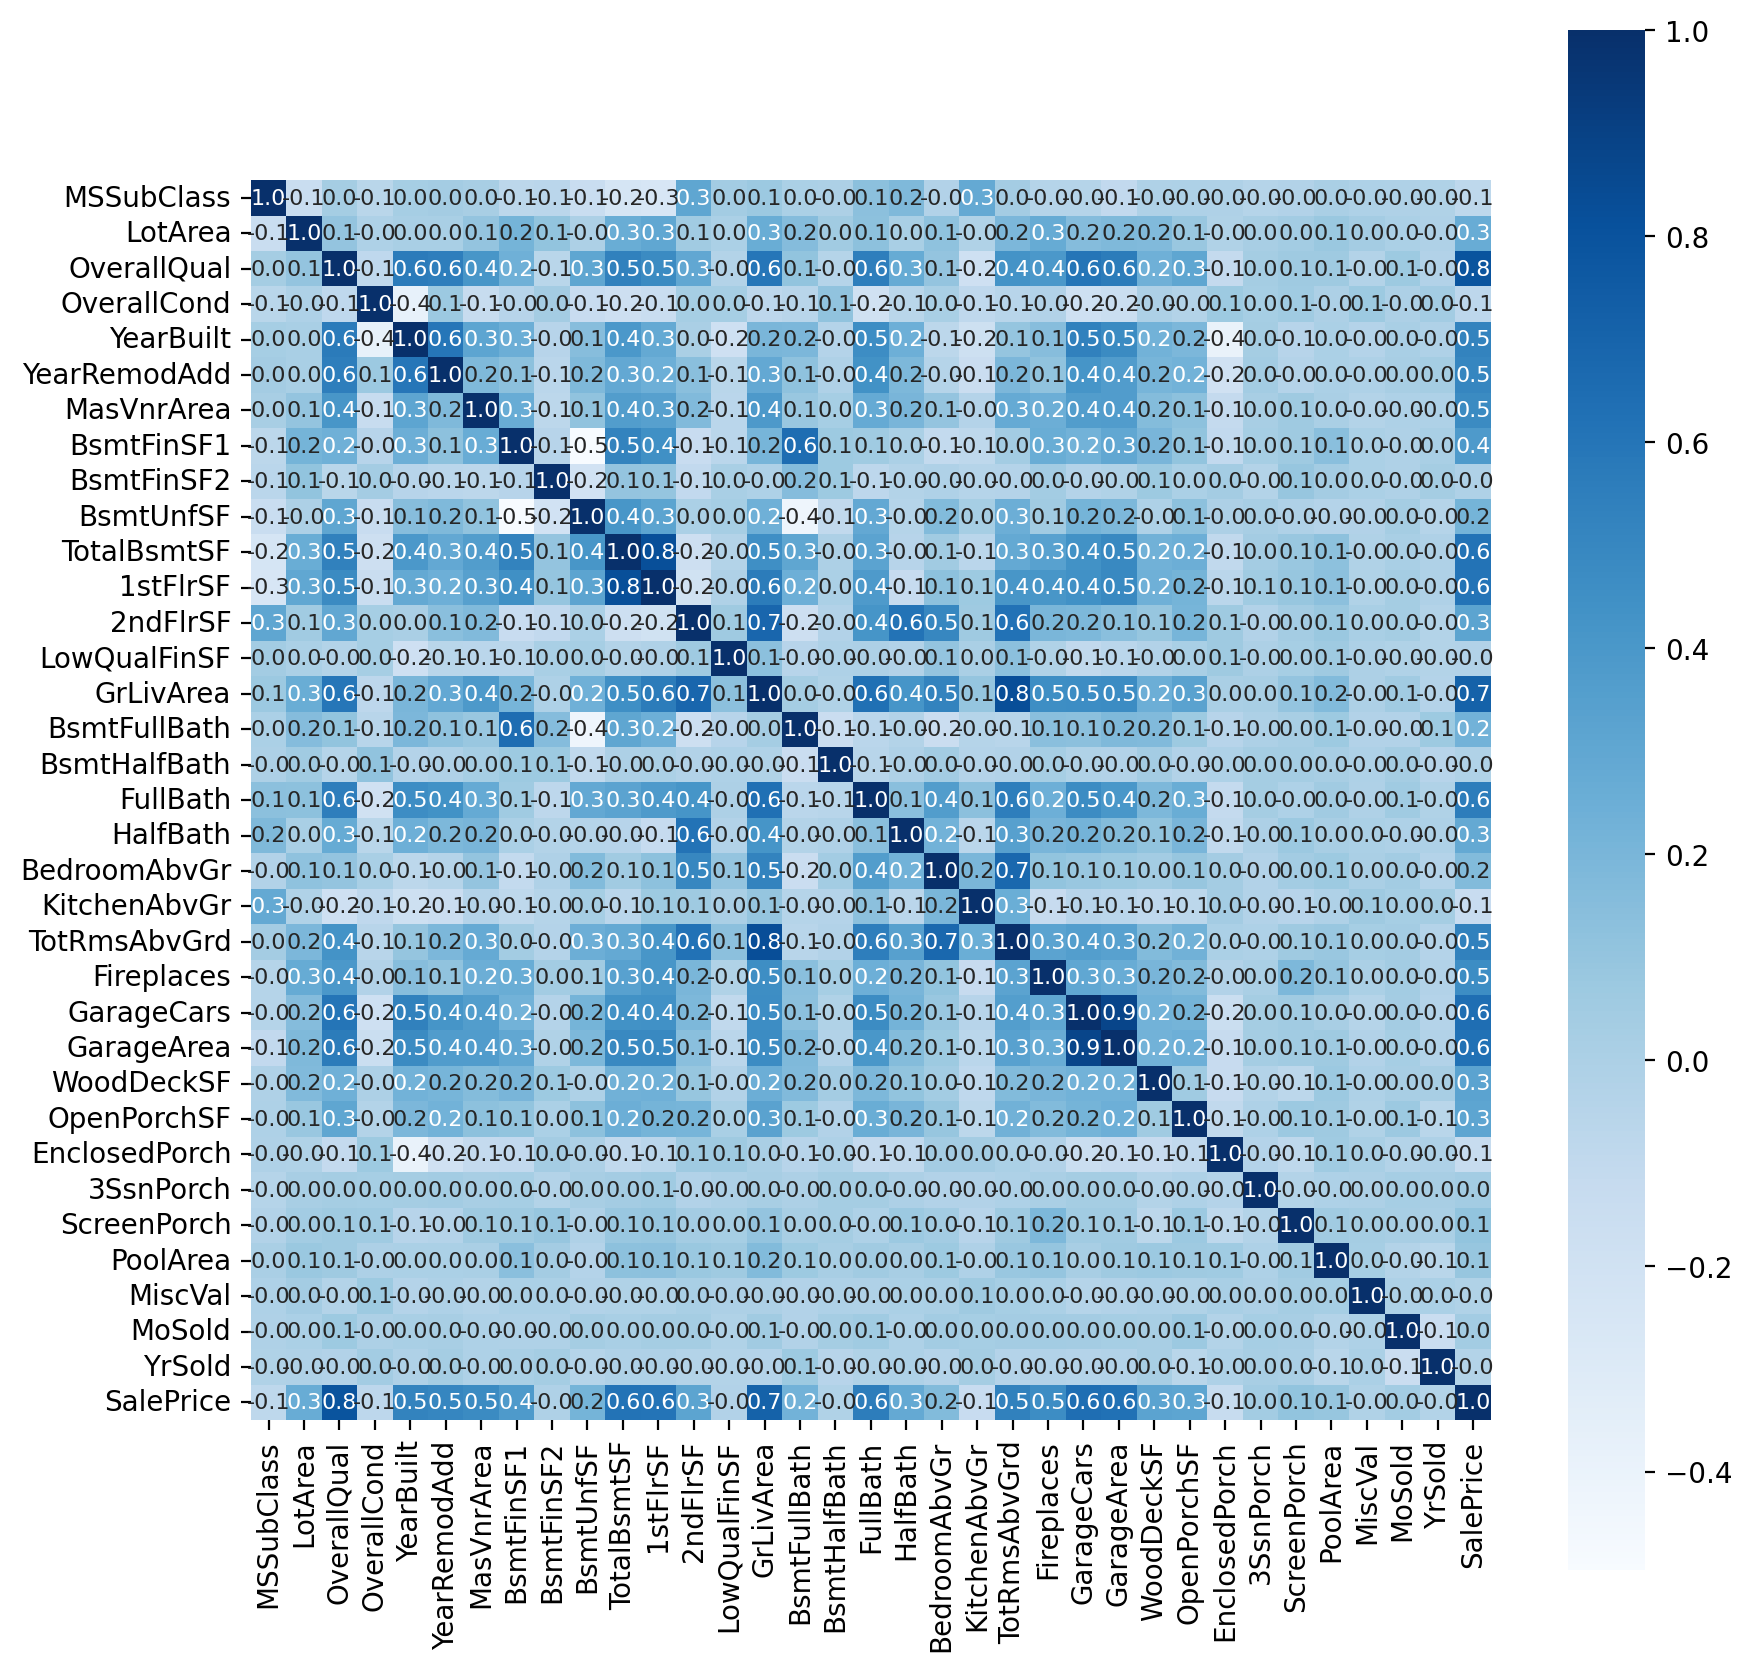

In [13]:
correlation=df.corr(numeric_only=True)
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [91]:
correlation

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023156,-0.069501,-0.065549,-0.140627,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.104141,0.214121,0.111158,-0.002641,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.411699,0.239265,-0.059291,0.308018,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.128333,-0.046595,0.040132,-0.137008,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.316345,0.250465,-0.048903,0.149444,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.180136,0.129259,-0.067575,0.181520,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
MasVnrArea,0.023156,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,0.114298,...,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,0.264469,1.000000,-0.050328,-0.495718,...,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.072443,-0.050328,1.000000,-0.209395,...,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,0.114298,-0.495718,-0.209395,1.000000,...,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446


In [14]:
# identify the features that have the strongest correlation with the "SalePrice" column.
corr=correlation['SalePrice'].apply(abs).sort_values(ascending=False).reset_index()
corr

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.791069
2,GrLivArea,0.708618
3,GarageCars,0.640473
4,GarageArea,0.623423
5,TotalBsmtSF,0.613905
6,1stFlrSF,0.605968
7,FullBath,0.560881
8,TotRmsAbvGrd,0.533779
9,YearBuilt,0.523273


In [103]:
corr.iloc[21: ,0].values 

array(['BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch',
       'PoolArea', 'MSSubClass', 'OverallCond', 'MoSold', '3SsnPorch',
       'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'],
      dtype=object)

In [15]:
print(f"before delete weak correlation => {df.shape}")
df = df.drop(corr.iloc[21: , 0].values,axis=1)

print(f"after delete weak correlation => {df.shape}")

before delete weak correlation => (1459, 68)
after delete weak correlation => (1459, 54)


fillna in each numeric column

In [16]:
numeric_columns_names=df.select_dtypes(include='number').columns
# filna in each column using mean
for col in (numeric_columns_names):
    df[col].fillna(df[col].mean,inplace=True)


# show sum of NaN in each column
col_has_numbers=df.select_dtypes(include='number')
col_has_numbers.isnull().sum().sort_values(ascending=False)


C:\Users\محمد\AppData\Local\Temp\ipykernel_20424\1427176233.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.mean of 0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1459, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(df[col].mean,inplace=True)


LotArea         0
OverallQual     0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
BsmtFullBath    0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF1      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

fillna each categorical columns 

In [21]:
#first selecting categorical columns from the dataframe 
categ_columns=df.select_dtypes(include=['object']).columns


#fillna each column with mode 
for col in categ_columns:
    df[col].fillna(df[col].mode , inplace=True)

# show sum of nan in each value 
names_of_categorical=df.select_dtypes(include='object')
names_of_categorical.isnull().sum().sort_values(ascending=False)



MSZoning         0
Heating          0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
Street           0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
ExterCond        0
ExterQual        0
MasVnrArea       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
SaleCondition    0
dtype: int64

# Handling ouliers using IQr

In [19]:
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[col]>upper,col)]=upper
    dataframe.loc[(dataframe[col]<lower,col)]=lower 
    # np.where(condition, if True excute this, NO excute this)
    # dataframe[column] = np.where((dataframe[column] < lower) | (dataframe[column] > upper), dataframe[column].median(), dataframe[column])
    return dataframe

for col in df.select_dtypes(include=["number"]).columns :
    df = handle_outliers_iqr(df, col)


C:\Users\محمد\AppData\Local\Temp\ipykernel_20424\1672401925.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2059.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col]>upper,col)]=upper
C:\Users\محمد\AppData\Local\Temp\ipykernel_20424\1672401925.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1781.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col]>upper,col)]=upper
C:\Users\محمد\AppData\Local\Temp\ipykernel_20424\1672401925.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1685.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col]>upper,col)]=upper
C:\Users\محم

this plot show the outoutliers in each column after deleting them


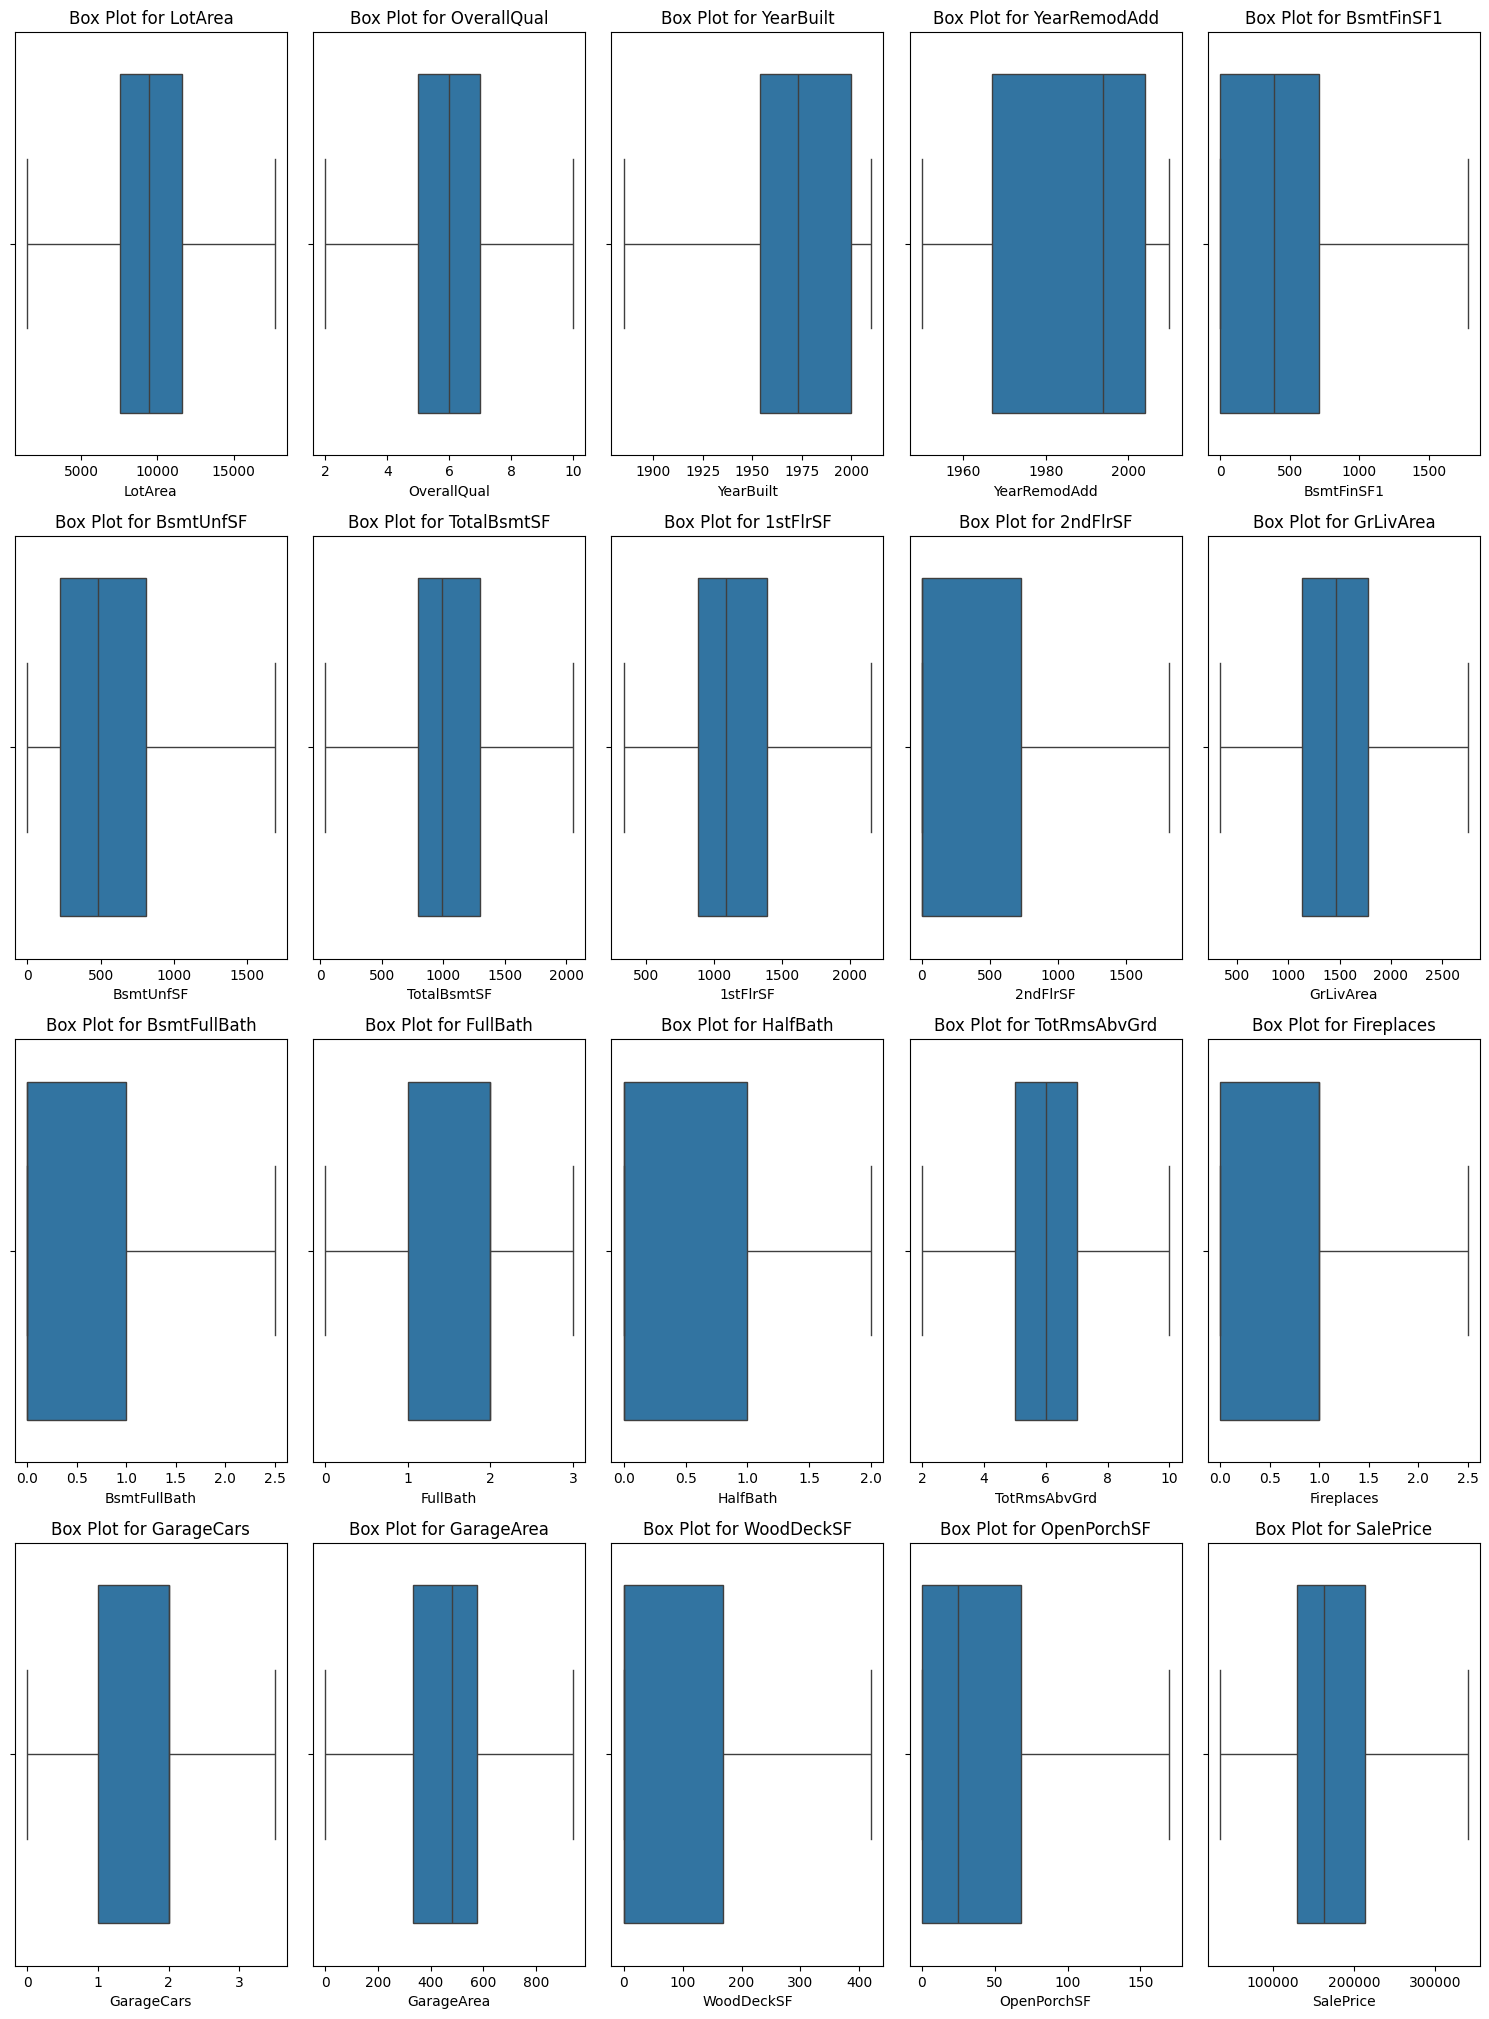

In [20]:
print("this plot show the outoutliers in each column after deleting them")

# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 5  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it into 1D array it's easier to access  
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

# Feature encoding 

In [24]:
#select the categorical columns 
catego_col=df.select_dtypes(include=['object']).columns
catego_col=pd.DataFrame(catego_col,columns=['string columns'])
print('the number of string columns is :',catego_col.shape)
catego_col




the number of string columns is : (34, 1)


,string columns
0,MSZoning
1,Street
2,LotShape
3,LandContour
4,Utilities
5,LotConfig
6,LandSlope
7,Neighborhood
8,Condition1
9,Condition2


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in catego_col.values:
    df[col]=encoder.fit_transform(col)

In [31]:
df.select_dtypes(include=['object']).columns 
# will return empty list 

Index([], dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1459 non-null   int32  
 1   LotArea        1459 non-null   int64  
 2   Street         1459 non-null   int32  
 3   LotShape       1459 non-null   int32  
 4   LandContour    1459 non-null   int32  
 5   Utilities      1459 non-null   int32  
 6   LotConfig      1459 non-null   int32  
 7   LandSlope      1459 non-null   int32  
 8   Neighborhood   1459 non-null   int32  
 9   Condition1     1459 non-null   int32  
 10  Condition2     1459 non-null   int32  
 11  BldgType       1459 non-null   int32  
 12  HouseStyle     1459 non-null   int32  
 13  OverallQual    1459 non-null   int64  
 14  YearBuilt      1459 non-null   int64  
 15  YearRemodAdd   1459 non-null   float64
 16  RoofStyle      1459 non-null   int32  
 17  RoofMatl       1459 non-null   int32  
 18  Exterior1st  

# Building Models 

In [33]:


#split the data to features and target
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#split the data into features and target
x=df[['OverallQual']] # the feature with the high corr with the target
y=df['SalePrice']
#split the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [45]:
#let's scale the training and testing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [44]:
print(x.shape,x_train.shape,x_test.shape)

(1459, 1) (1167, 1) (292, 1)


In [47]:
#loading the model
model=LinearRegression()
#training the model
model.fit(x_train_scaled,y_train)

LinearRegression()

In [48]:
y_predict=model.predict(x_test_scaled)


In [49]:
# evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
r2_score(y_test,y_predict)

0.6992290448326528

# Multiple linear regression 

In [50]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
print(x.shape,x_train.shape,x_test.shape)

(1459, 53) (1167, 53) (292, 53)


In [52]:
#let's scale the training and testing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [53]:
#loading the model
mlr=LinearRegression()
#training the model
mlr.fit(x_train_scaled,y_train)


LinearRegression()

In [54]:
pred=mlr.predict(x_test_scaled)

In [57]:
#evaluating the model
score=r2_score(y_test,pred)
score

0.8781909227675432

# lasso model


In [58]:
from sklearn.linear_model import Lasso ,Ridge
from sklearn.model_selection import GridSearchCV

#loading lasso model
Lasso_model=Lasso()

#training the lasso model
Lasso_model.fit(x_train_scaled,y_train)




Lasso()

In [59]:
lasso_predic=Lasso_model.predict(x_test_scaled)

Evaluating lasso model

In [61]:
mean_absolute_error(y_test,lasso_predic)

18557.11187712506

In [62]:
mean_squared_error(y_test,lasso_predic)

575461211.657004

In [63]:
r2_score(y_test,lasso_predic)

0.8782313174039904

# Hyper parameter tunning using GRidSearchCv

In [64]:
param = {

    'alpha' : [0.1,0.001,0.0001,1,100]
}

lasso_cv = GridSearchCV(Lasso_model, param , cv=3 , n_jobs=-1)

lasso_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1, 100]})

In [65]:
y_pred_1 = lasso_cv.predict(x_test_scaled)

r2_score(y_test, y_pred_1)

0.8817158931671736

In [93]:
#accuracy in the training
print("the accuracy of lasso model in training is :",lasso_cv.score(x_train_scaled,y_train))
#accuracy in testing 
print("the accuray of lasso model in testing is :",lasso_cv.score(x_test_scaled,y_test))

the accuracy of lasso model in training is : 0.8649789665570717
the accuray of lasso model in testing is : 0.8817158931671736


In [66]:
lasso_cv.best_estimator_

Lasso(alpha=100)

# Ridge model

In [67]:
#loading ridge model
ridge_model=Ridge()

#training the model
ridge_model.fit(x_train_scaled,y_train)

Ridge()

In [68]:
y_pred_ridge=ridge_model.predict(x_test_scaled)

In [69]:
r2_score(y_test,y_pred_ridge)

0.8787440966895045

Hyper parameter tunning using GRidSearchCv

In [70]:
param = {

    'alpha' : [0.1,0.001,0.0001,0.00001,1,100]
}

ridge_cv = GridSearchCV(ridge_model, param , cv=3 , n_jobs=-1)

ridge_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1e-05, 1, 100]})

In [71]:
y_pred_ridge = ridge_cv.predict(x_test_scaled)

r2_score(y_test, y_pred_ridge)

0.8787440966895045

## so the best model found is the lasso model with GridSearchCv

In [73]:
import pickle

# let's Save the best model
with open('best_lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_cv.best_estimator_, f)


In [75]:
import joblib
# Save the model
joblib.dump(lasso_cv, 'lasso_cv_model.pkl')

['lasso_cv_model.pkl']

# support vector regressor 

In [98]:
from sklearn.svm import SVR
#load the model
svr=SVR(kernel='linear',C=100)
#training the model
svr.fit(x_train_scaled,y_train)




c:\python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, kernel='linear')

In [99]:
svr_predict=svr.predict(x_test_scaled)

In [100]:
#accuracy on training 
print("the accuracy of svr in training is :",svr.score(x_train_scaled,y_train))
print("the accuracy of svr in testing is :",svr.score(x_test_scaled,y_test))

the accuracy of svr in training is : 0.8487869171638791
the accuracy of svr in testing is : 0.8726591429250483


In [101]:
r2_score(y_test,svr_predict)

0.8726591429250483